In [2]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt

###**LOAD AUDIO DATA**

In [10]:
classical_file = "/content/drive/MyDrive/Librosa-Github/classical.00024.wav"

In [11]:
ipd.Audio(classical_file)

In [12]:
# load audio files with librosa
classical, sr = librosa.load(classical_file)

###**MEL SCALE**

Studies have shown that humans do not perceive frequencies on a linear scale. We are better at detecting differences in lower frequencies than higher frequencies. For example, we can easily tell the difference between 500 and 1000 Hz, but we will hardly be able to tell a difference between 10,000 and 10,500 Hz, even though the distance between the two pairs are the same.


In 1937, Stevens, Volkmann, and Newmann proposed a unit of pitch such that equal distances in pitch sounded equally distant to the listener. This is called the mel scale. We perform a mathematical operation on frequencies to convert them to the mel scale.


![image](https://user-images.githubusercontent.com/81585804/128631128-a9cf86e9-12f5-49f0-bcc0-74d8ea26bf8f.png)


![image](https://user-images.githubusercontent.com/81585804/128631625-e6876e8e-1e32-457e-8bde-4ff6e909e06e.png)

Luckily, someone computed this non-linear transformation for us, and all we need to do to apply it is use the appropriate command from librosa.



```
n_mels = 128
mel = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mels)
```


But what does this give us?
It partitions the Hz scale into bins, and transforms each bin into a corresponding bin in the Mel Scale, using overlapping triangular filters.


![image](https://user-images.githubusercontent.com/81585804/128631176-c5155b9a-077c-4f34-8b61-804447869633.png)


####***Mel Filter Banks***

For Mel Filter Banks we should follow these steps.



1.   Convert lowest / highest frequency to Mel.
2.  Create  x number bands equally spaced points as the number of mel bands we gonna use.
3.	Convert points back to Hertz.
4.	Round to nearest frequency bin
5.	Create triangular filters


![image](https://user-images.githubusercontent.com/81585804/128631740-ece40c03-a713-4db8-b1e8-fcc4591a97e8.png)

In [5]:
filter_banks = librosa.filters.mel(n_fft=2048, sr=22050, n_mels=10)

In [6]:
filter_banks.shape

(10, 1025)

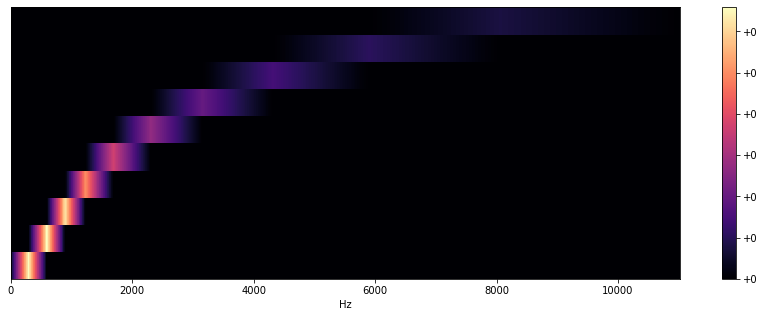

In [14]:
plt.figure(figsize=(15, 5))
librosa.display.specshow(filter_banks, 
                         sr=sr, 
                         x_axis="linear")
plt.colorbar(format="%+2.f")
plt.show()

###**MEL SPECTOGRAM**

A mel spectrogram is a spectrogram where the frequencies are converted to the mel scale. I know, right? Who would’ve thought? What’s amazing is that after going through all those mental gymnastics to try to understand the mel spectrogram, it can be implemented in only a couple lines of code.

In [15]:
mel_spectrogram = librosa.feature.melspectrogram(classical, sr=sr, n_fft=2048, hop_length=512, n_mels=10)

In [16]:
mel_spectrogram.shape

(10, 1293)

In [17]:
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)

In [18]:
log_mel_spectrogram.shape

(10, 1293)

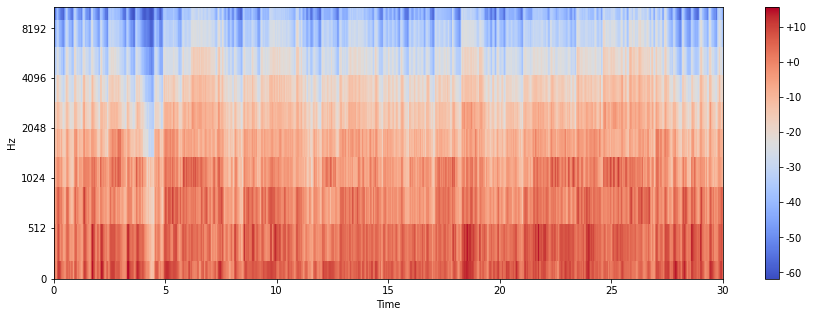

In [20]:
plt.figure(figsize=(15, 5))
librosa.display.specshow(log_mel_spectrogram, 
                         x_axis="time",
                         y_axis="mel", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

### **Recap For Mel Spectograms**
The Mel Spectrogram is the result of the following pipeline:


1.***Separate to windows:*** Sample the input with windows of size n_fft=2048, making hops of size hop_length=512 each time to sample the next window.

2.***Compute FFT (Fast Fourier Transform)*** for each window to transform from time domain to frequency domain.


3.***Generate a Mel scale:*** Take the entire frequency spectrum, and separate it into n_mels=128 evenly spaced frequencies.
And what do we mean by evenly spaced? not by distance on the frequency dimension, but distance as it is heard by the human ear.


4.***Generate Spectrogram:*** For each window, decompose the magnitude of the signal into its components, corresponding to the frequencies in the mel scale.